# Task 6 :Prediction using Decision Tree Algorithm

Description :Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to 
predict the right class accordingly. 

●Done by: Yashashree Yadav

● Dataset : https://bit.ly/3kXTdox

●Language Used: Python




In [1]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#importing dataset
path="E:\Downloads\Iris.csv"
iris_df=pd.read_csv(path)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
#checking if there are Ny null values in the dataset to clean the data
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
iris_df.drop('Id',axis=1,inplace=True)

<Figure size 600x1000 with 0 Axes>

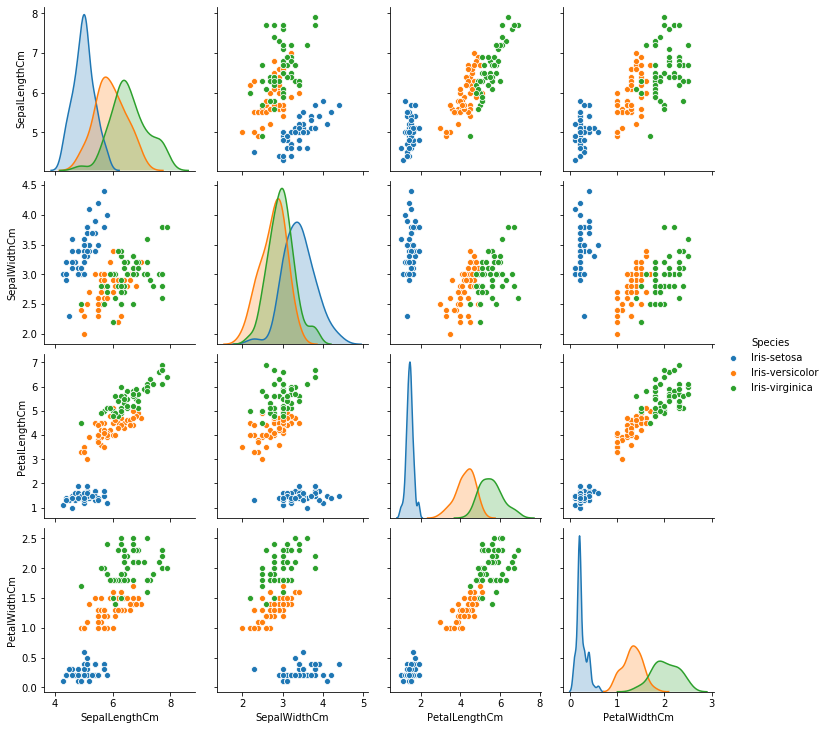

In [6]:
import seaborn as sns 
plt.figure (figsize=(6,10), dpi= 100, facecolor='w')
sns.pairplot(iris_df,  hue = "Species")

In [7]:
#forming train test dataset
train,test=train_test_split(iris_df,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [8]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

### Now let us define the Decision Tree Algorithm 

In [9]:
#Defining decision tree algorithm
dtree=DecisionTreeClassifier(max_depth=3,random_state=1)
model_all_params=DecisionTreeClassifier().fit(train_X,train_y)

print("The Decision Tree Classifier created")

The Decision Tree Classifier created


In [10]:
#prediction
prediction=model_all_params.predict(test_X)


In [11]:
#taking an example to seee prediction
X=[[5.3,2.5,1.3,0.3]]
pre=model_all_params.predict(X)
print(pre)

['Iris-setosa']


In [12]:
#Accuracy 
print('The accuracy of decision tree is',"{:.3f}".format(metrics.accuracy_score(prediction,test_y)))

The accuracy of decision tree is 0.956


Model is 95.6% accurate

In [13]:
cn=np.unique(iris_df.Species)
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

[Text(669.5999999999999, 1514.3142857142857, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [32, 38, 35]\nclass = Iris-versicolor'),
 Text(446.4, 1281.3428571428572, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = Iris-setosa'),
 Text(892.8, 1281.3428571428572, 'PetalLengthCm <= 4.75\ngini = 0.499\nsamples = 73\nvalue = [0, 38, 35]\nclass = Iris-versicolor'),
 Text(669.5999999999999, 1048.3714285714286, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(1116.0, 1048.3714285714286, 'PetalWidthCm <= 1.7\ngini = 0.184\nsamples = 39\nvalue = [0, 4, 35]\nclass = Iris-virginica'),
 Text(446.4, 815.4, 'PetalLengthCm <= 4.95\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = Iris-virginica'),
 Text(223.2, 582.4285714285713, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Iris-versicolor'),
 Text(669.5999999999999, 582.4285714285713, 'SepalLengthCm <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Iris-virginica'),
 Text(446.4,

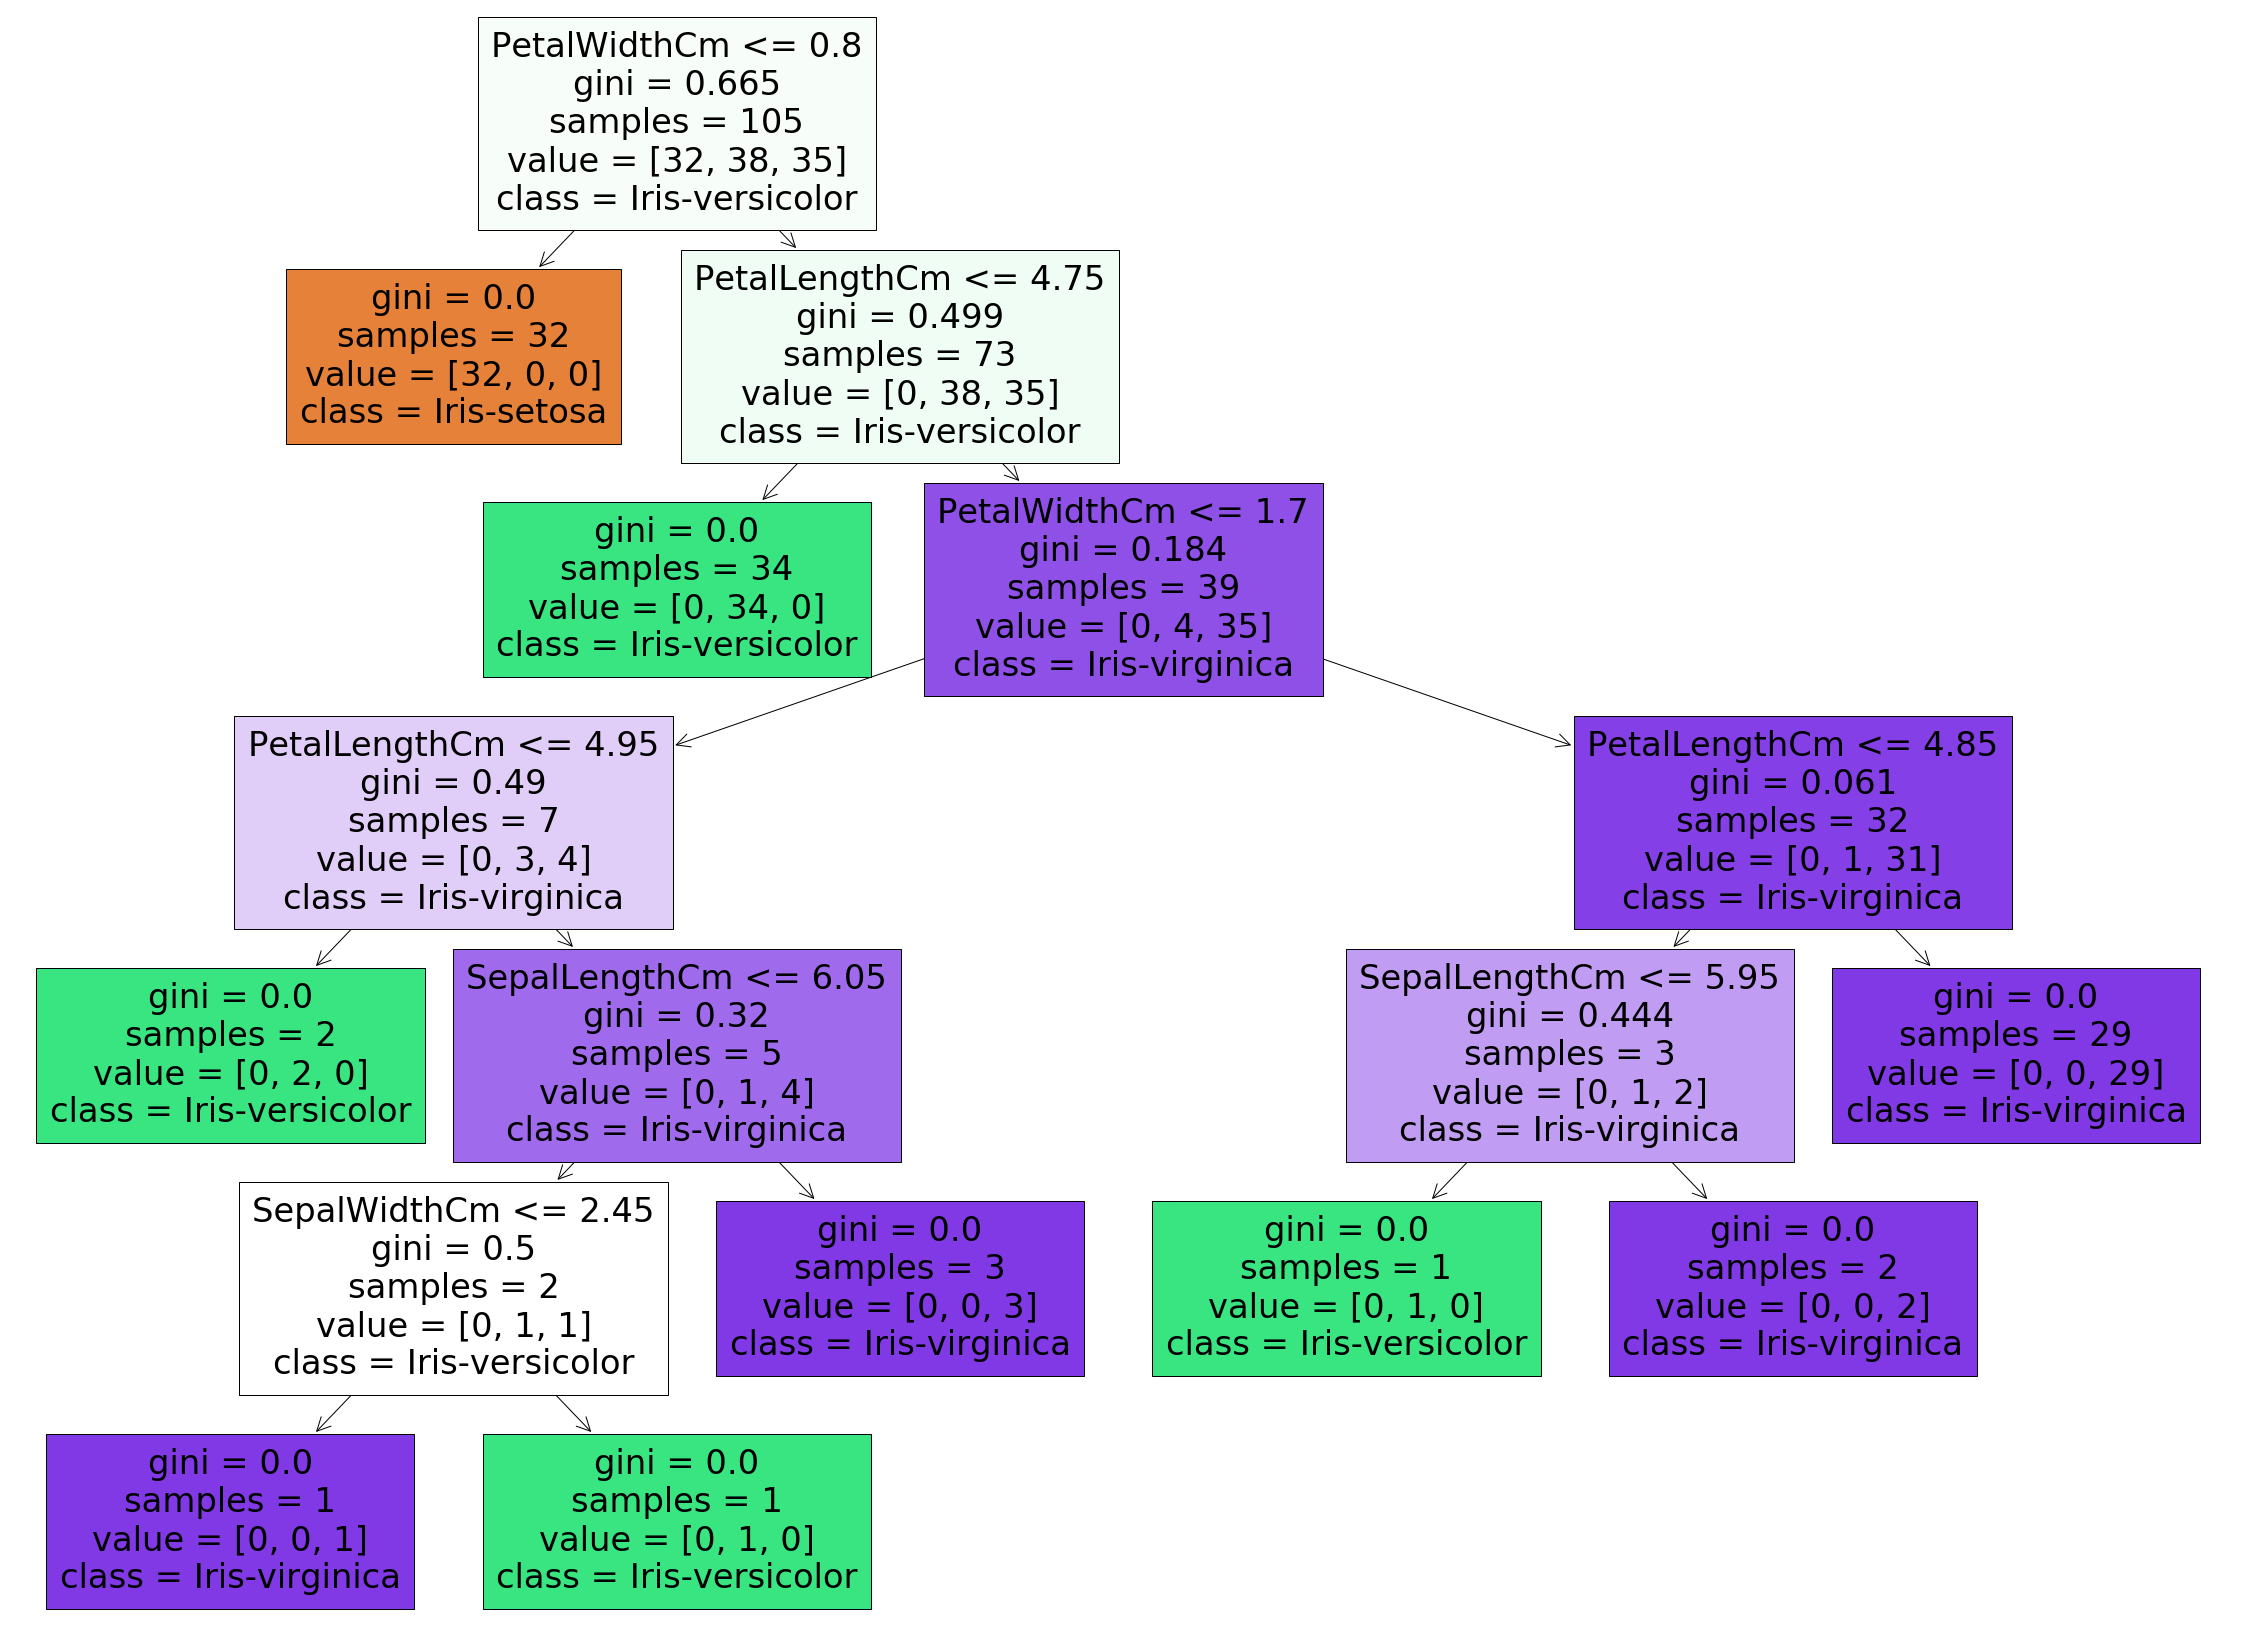

In [14]:
plt.figure(figsize = (40,30))

plot_tree(model_all_params,feature_names=fn,class_names = cn,filled = True)
